# Trabalho 2 Aprendizagem Automática

## Index
1. [Imports and Data Preparation](#imports)
2. [Models Used for Subissions](#modelsforsub)
    1. [GradientBoosting](#gradboost)
    2. [DecisionTree](#dectree)
    3. [LinearSVC](#linearsvc)
    4. [RandomForest](#randfor)
3. [Models Tried only Localy](#modelslocal)
    1. [KNeighborsClassifier](#knn)
    2. [LogisticRegression](#lr)
    3. [MLPClassifier](#mlp)
    4. [GaussianNB](#nbc)

<a id="imports"></a>
## Imports and csv reading of train and test
First of all we need to import all the tools and classifiers we'll use.

In [3]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
import pandas as pd
from matplotlib import pyplot
import numpy

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

Then we read the csv files.

In [12]:
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

Let's check all the feature types so we know if any tranformation is needed.

In [3]:
print(data.dtypes)

Id                 int64
Program           object
Y0s1_enrol       float64
Y0s2_enrol       float64
Y1s1_enrol       float64
Y1s1_complete    float64
Y1s1_grade       float64
Y1s2_enrol       float64
Y1s2_complete    float64
Y1s2_grade       float64
Y2s1_enrol       float64
Y2s1_complete    float64
Y2s1_grade       float64
Y2s2_enrol       float64
Y2s2_complete    float64
Y2s2_grade       float64
Y3s1_enrol       float64
Y3s1_complete    float64
Y3s1_grade       float64
Y3s2_enrol       float64
Y3s2_complete    float64
Y3s2_grade       float64
Y4s1_enrol       float64
Y4s1_complete    float64
Y4s1_grade       float64
Y4s2_enrol       float64
Y4s2_complete    float64
Y4s2_grade       float64
Rest_enrol       float64
Rest_complete    float64
Rest_grade       float64
Failure            int64
dtype: object


As we can see *Program* is the only feature of type object, so we'll use LabelEncoder's fit transform to turn it to integer type. We'll need to do this on both the training and test data.

In [13]:
le = LabelEncoder()
data.Program = le.fit_transform(data.Program)
test_data.Program = le.fit_transform(test_data.Program)

Now we'll see the statistics of the data using the panda.DataFrame.describe

In [5]:
print(data.describe())

                 Id      Program   Y0s1_enrol   Y0s2_enrol   Y1s1_enrol  \
count  1.846000e+03  1846.000000  1846.000000  1846.000000  1846.000000   
mean   1.287298e+08     1.705850    27.291441    29.136511    25.669827   
std    6.799903e+06     1.104629    10.693176    13.413551    13.125195   
min    1.113357e+08     0.000000     0.000000     0.000000     0.000000   
25%    1.313826e+08     1.000000    24.000000    24.000000    24.000000   
50%    1.313870e+08     2.000000    30.000000    30.000000    30.000000   
75%    1.313924e+08     3.000000    33.000000    36.000000    34.000000   
max    1.314154e+08     3.000000    63.000000    93.000000    90.000000   

       Y1s1_complete   Y1s1_grade   Y1s2_enrol  Y1s2_complete   Y1s2_grade  \
count    1846.000000  1846.000000  1846.000000    1846.000000  1846.000000   
mean       18.582340    10.459527    28.125948      20.036566    10.827696   
std        13.017874     6.100924    14.094108      13.309945     6.178580   
min         

We'll now count the number of students that dropped out and the ones that didn't.

In [6]:
count_class = data.groupby('Failure').size()
print(count_class)

Failure
0    1346
1     500
dtype: int64


Now we'll see the correlation between the *Failure* class and every feature using pandas.DataFrame.corr() with the Pearson's Correlation Coefficient.

Then we plot the correlation matrix so these correlations can be visualized

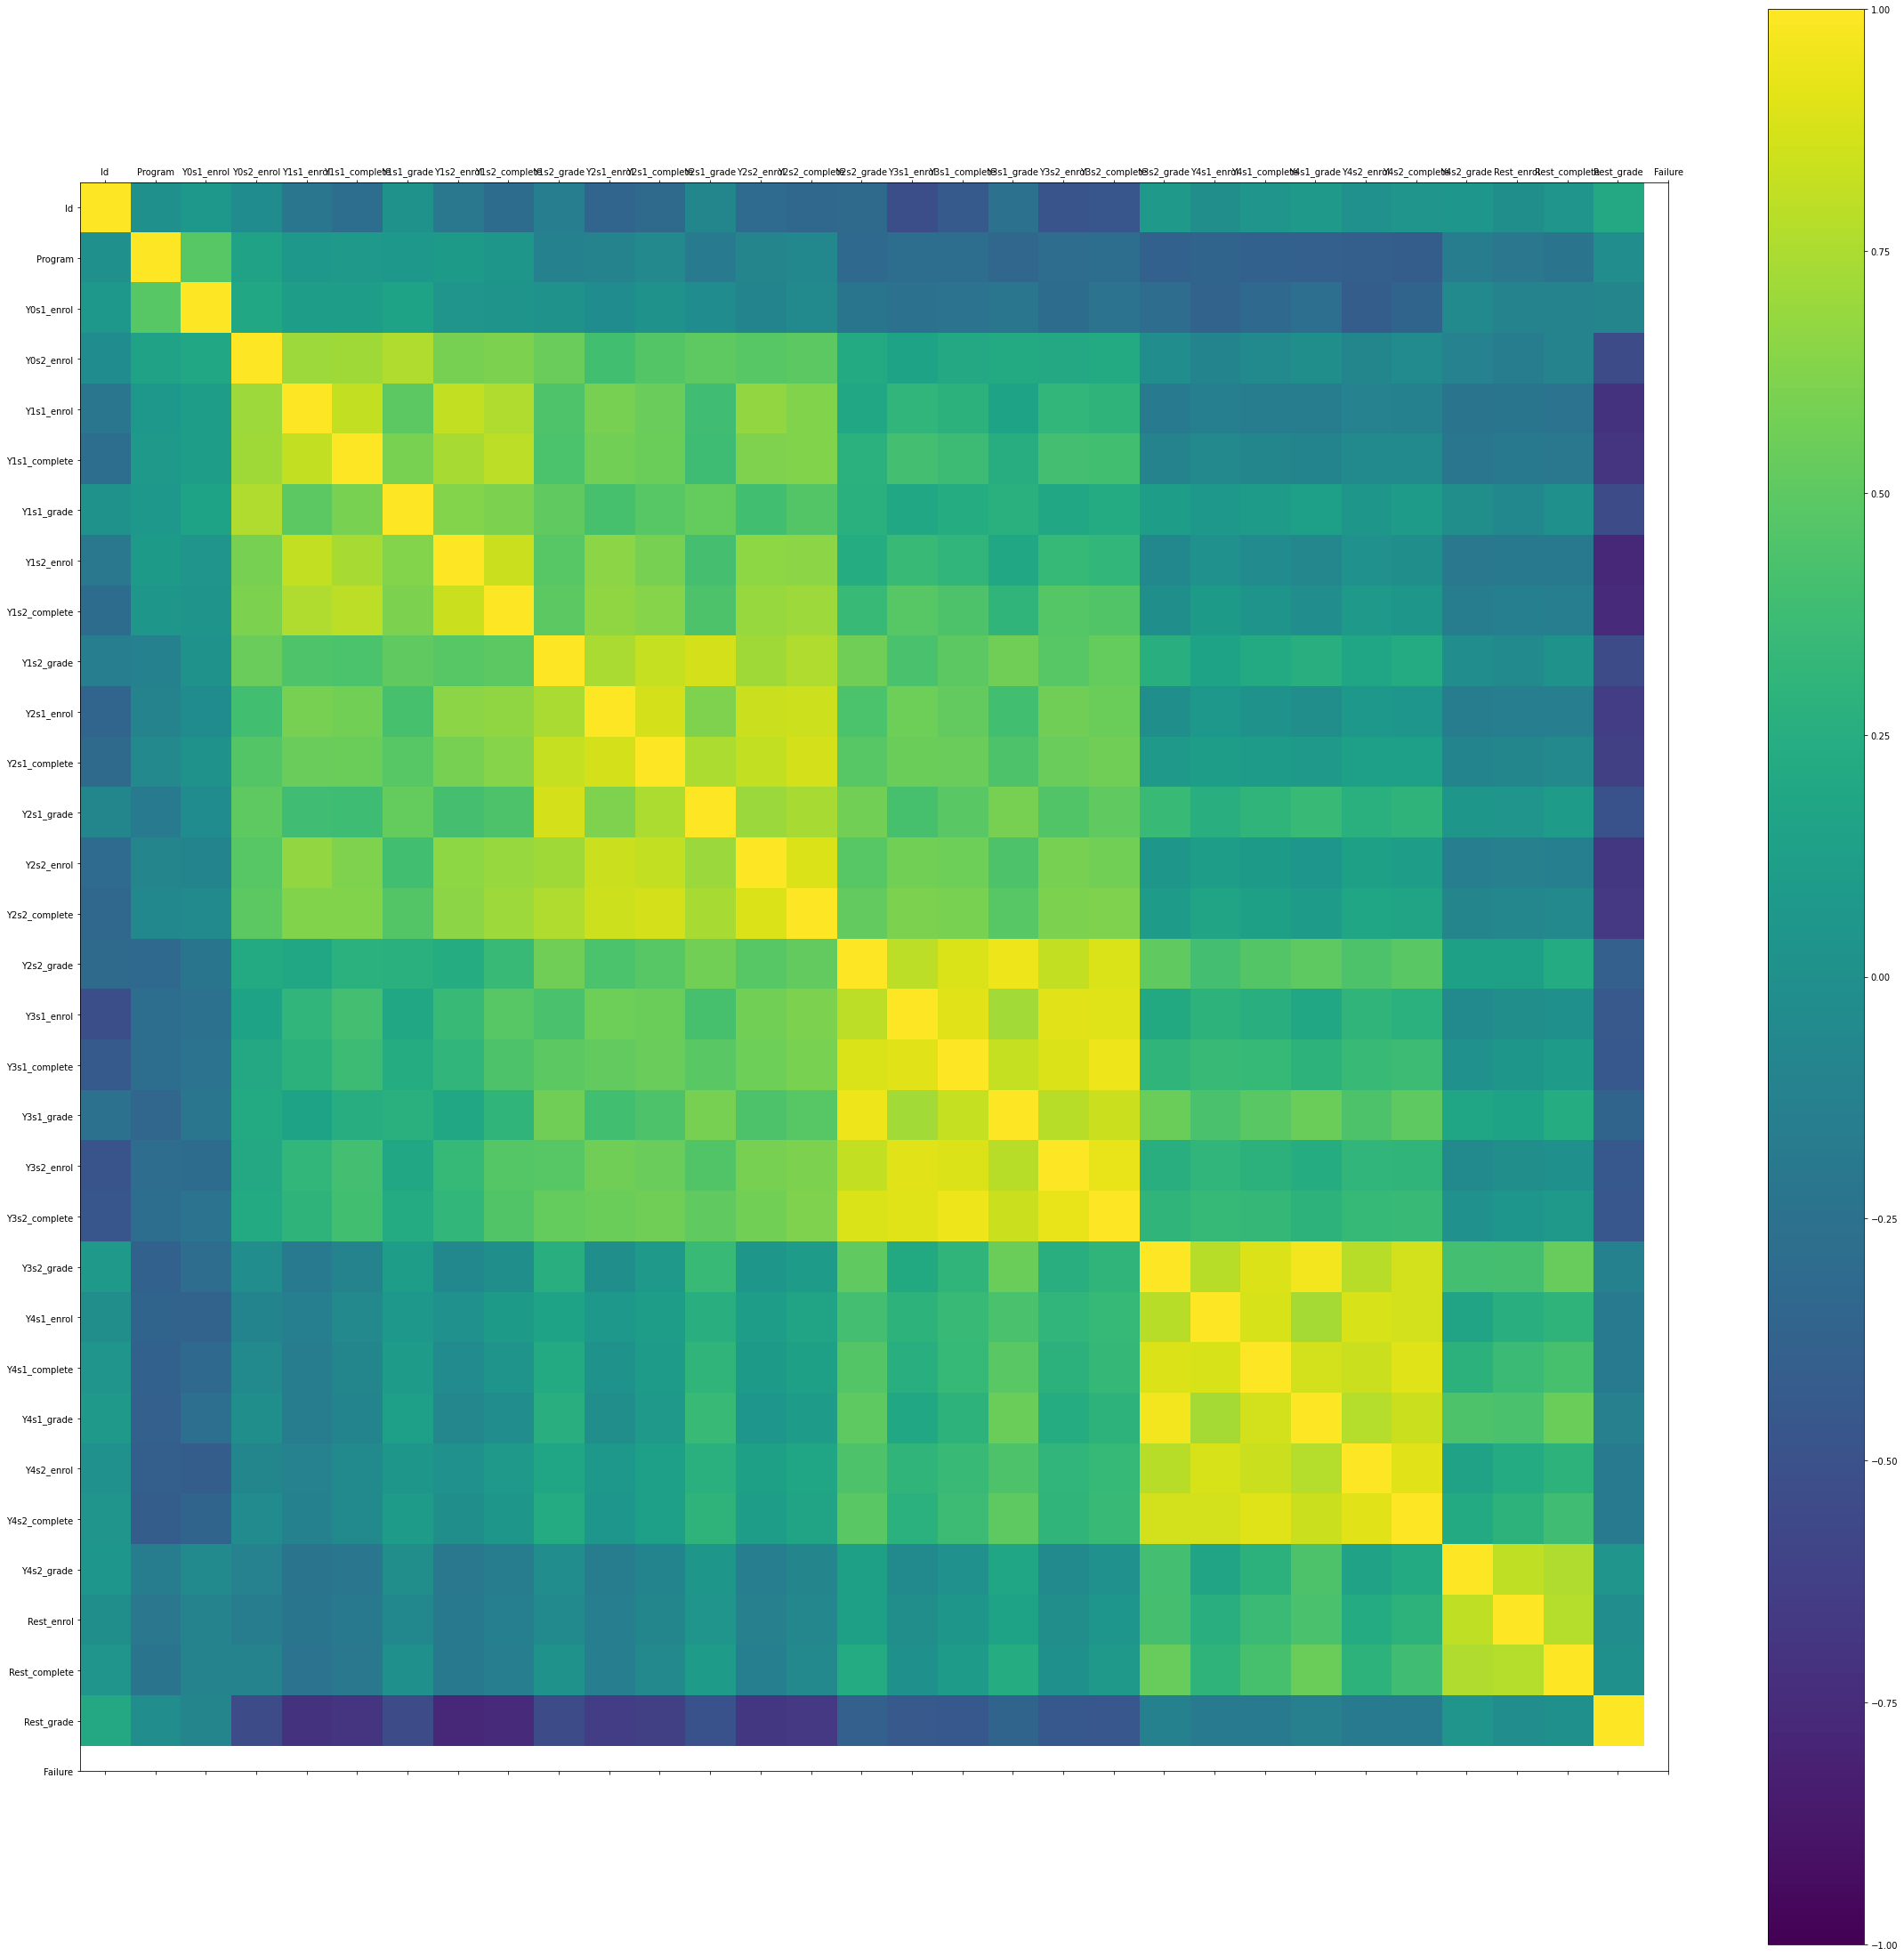

In [7]:
correlations = data.corr(method='pearson')
fig = pyplot.figure(figsize=[40,40])
ax = fig.add_subplot()
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,32,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
pyplot.show()

From the correlations now we could choose to drop some features that present a correlation coefficient closer to zero, this means that feature has almost no correlation to the *Failure* class.

In [9]:
print(correlations['Failure'])
for i in range(len(correlations['Failure']) - 1):
    if correlations['Failure'][i] < 0.1 and correlations['Failure'][i] > -0.1:
        print(data.columns[i])

Id               0.206332
Y0s1_enrol      -0.020436
Y0s2_enrol      -0.091424
Y1s1_enrol      -0.531970
Y1s1_complete   -0.708861
Y1s1_grade      -0.688093
Y1s2_enrol      -0.537492
Y1s2_complete   -0.767335
Y1s2_grade      -0.760829
Y2s1_enrol      -0.531868
Y2s1_complete   -0.639597
Y2s1_grade      -0.618347
Y2s2_enrol      -0.493394
Y2s2_complete   -0.674616
Y2s2_grade      -0.671319
Y3s1_enrol      -0.383964
Y3s1_complete   -0.444316
Y3s1_grade      -0.447449
Y3s2_enrol      -0.354095
Y3s2_complete   -0.448769
Y3s2_grade      -0.454196
Y4s1_enrol      -0.123271
Y4s1_complete   -0.172771
Y4s1_grade      -0.165871
Y4s2_enrol      -0.125538
Y4s2_complete   -0.183523
Y4s2_grade      -0.186876
Rest_enrol       0.039817
Rest_complete   -0.021411
Rest_grade       0.002298
Failure          1.000000
Name: Failure, dtype: float64
Program
Y0s1_enrol
Y4s2_grade
Rest_enrol
Rest_complete


Now let's plot the density plots for each of the float features.

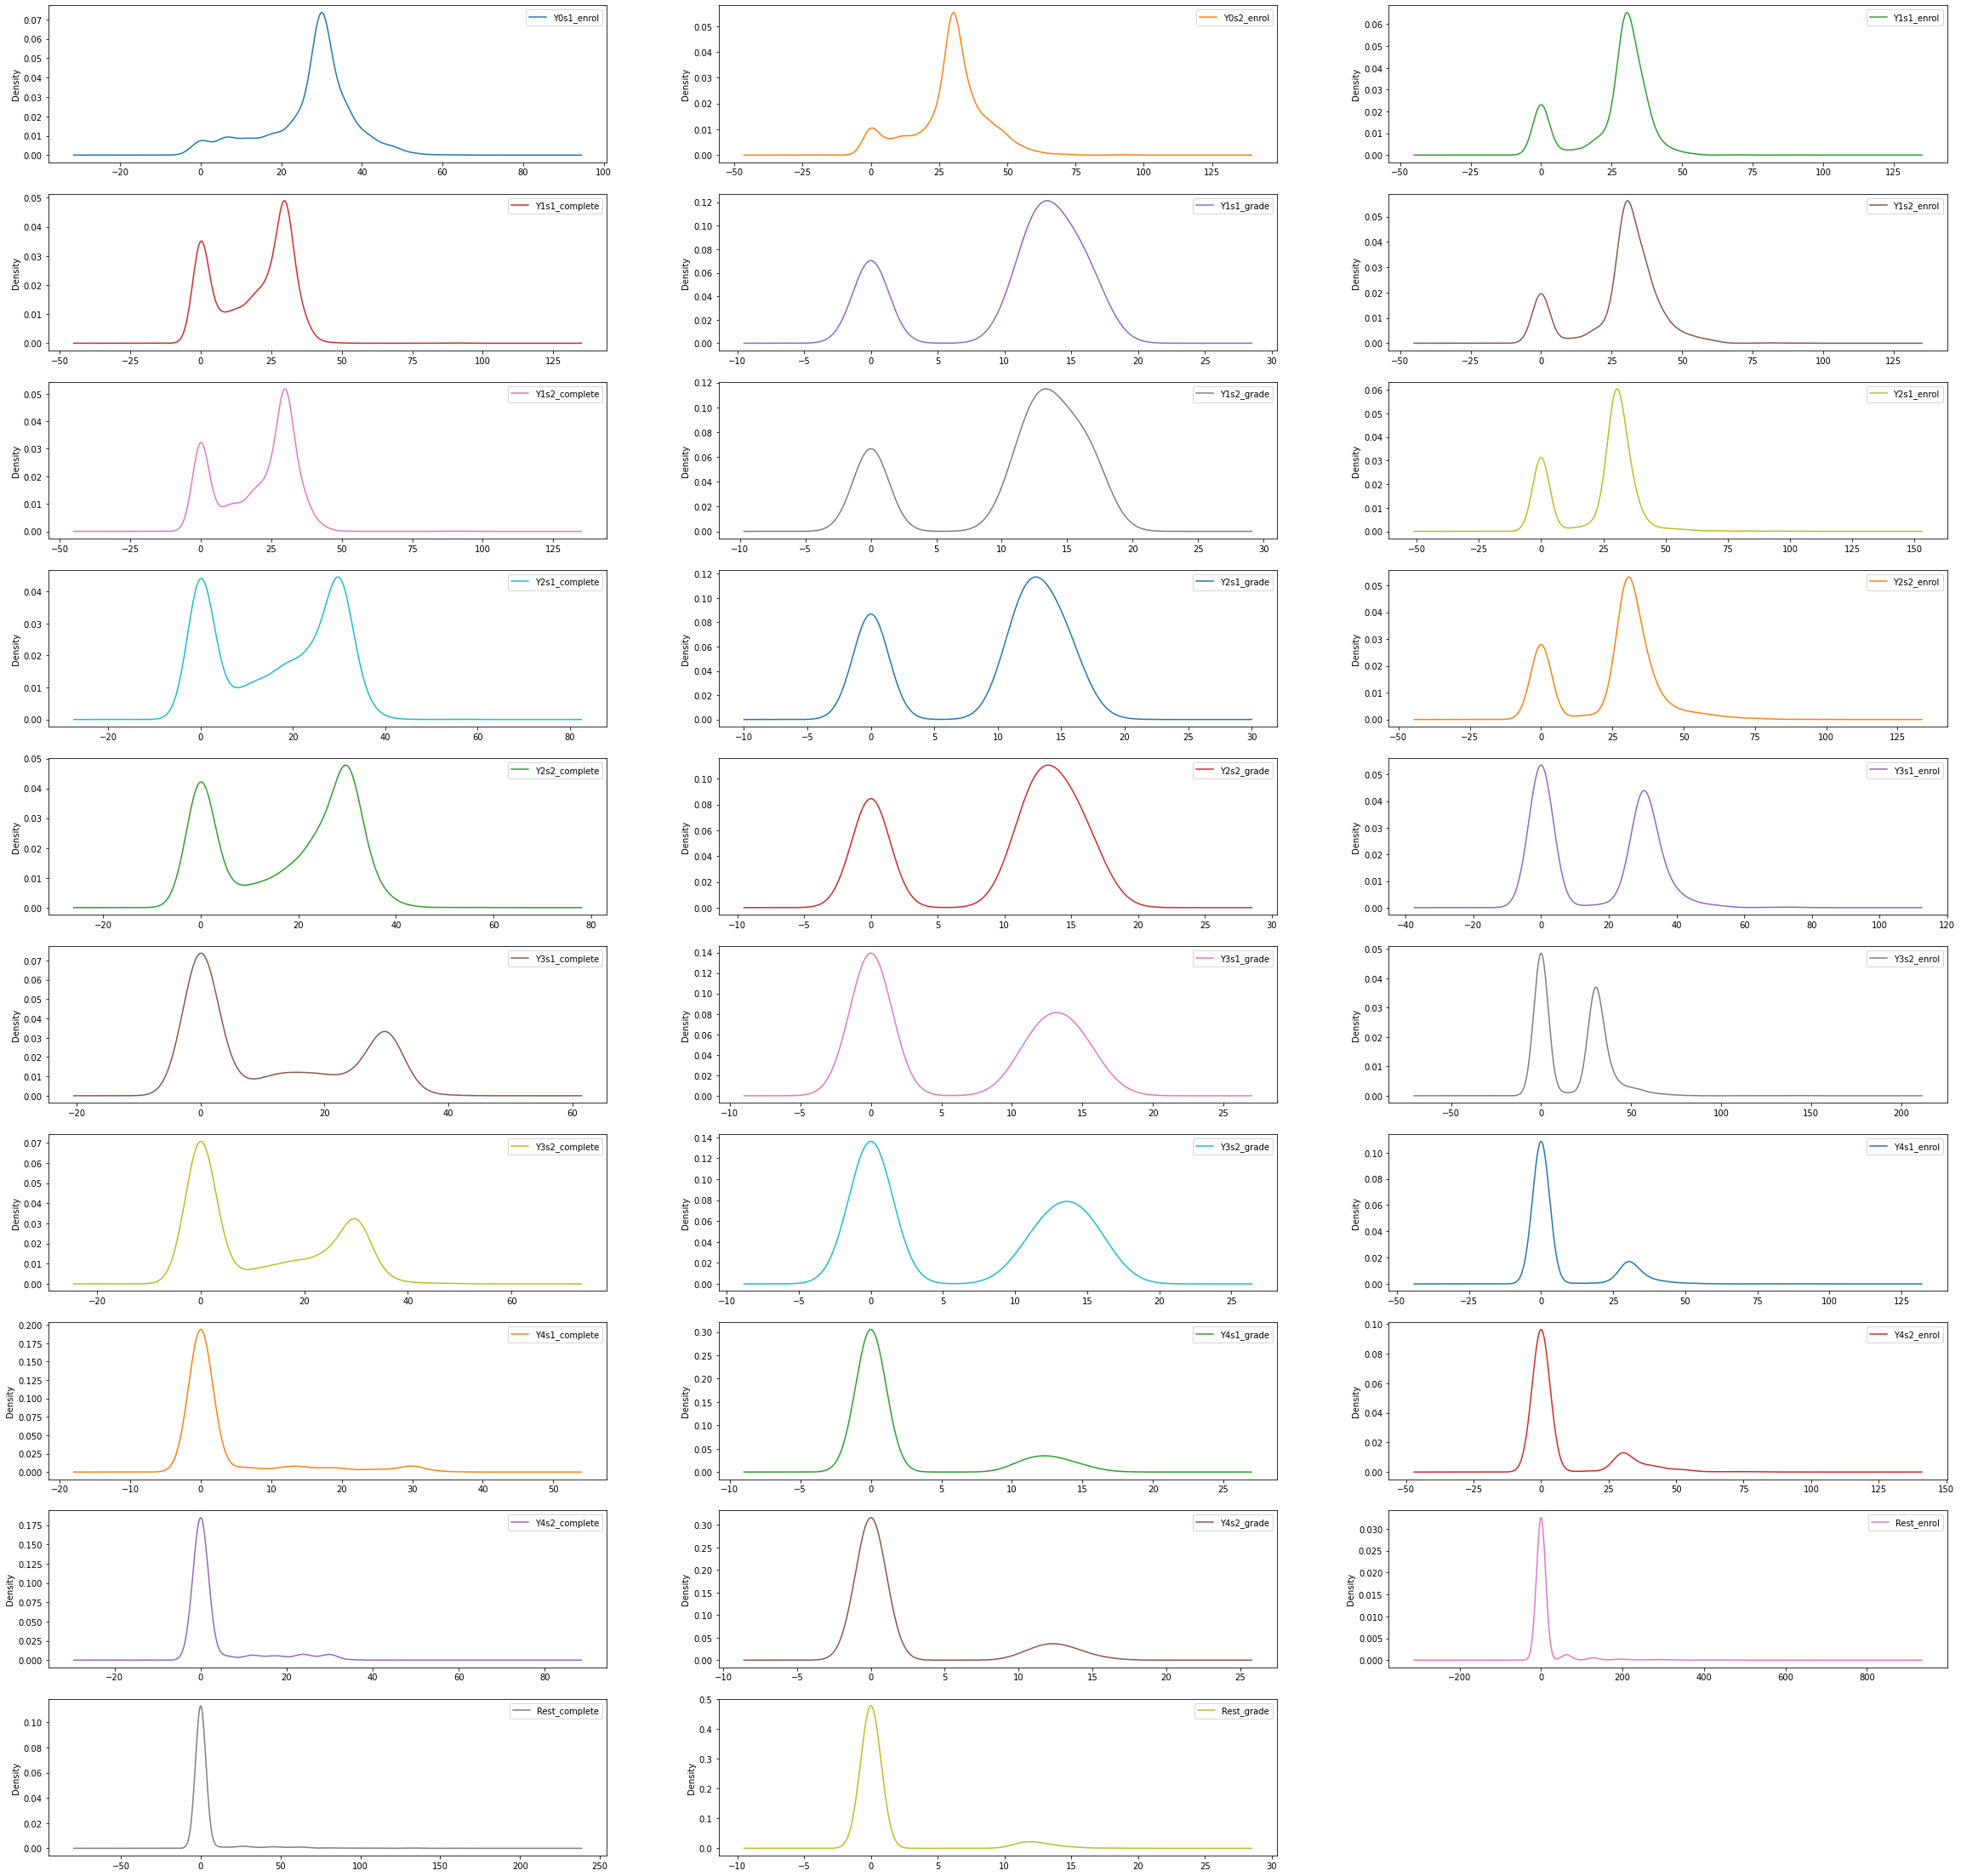

In [9]:
features = ['Y0s1_enrol', 'Y0s2_enrol', 'Y1s1_enrol',
       'Y1s1_complete', 'Y1s1_grade', 'Y1s2_enrol', 'Y1s2_complete',
       'Y1s2_grade', 'Y2s1_enrol', 'Y2s1_complete', 'Y2s1_grade', 'Y2s2_enrol',
       'Y2s2_complete', 'Y2s2_grade', 'Y3s1_enrol', 'Y3s1_complete',
       'Y3s1_grade', 'Y3s2_enrol', 'Y3s2_complete', 'Y3s2_grade', 'Y4s1_enrol',
       'Y4s1_complete', 'Y4s1_grade', 'Y4s2_enrol', 'Y4s2_complete',
       'Y4s2_grade', 'Rest_enrol', 'Rest_complete', 'Rest_grade']
data[features].plot(kind='kde',subplots=True, layout=(10,3), sharex=False, figsize=[40,40])
pyplot.show()

It's about time we stop analizing the data and start working with it.

We'll first separate the training set and the test set as follows:
- **X_train** - dataframe with the features from train.csv
- **y_train** - dataframe with the class from train.csv
- **X_test** - dataframe with the features from test.csv
- **X_evaltrain** - 75% of X_train for evaluation of the models used
- **X_evaltest** - 25% of X_train for evaluation of the models used
- **y_evaltrain** - 75% of y_train for evaluation of the models used
- **y_evaltest** - 25% of y_train for evaluation of the models used

In [15]:
#Preparation for training with train.csv
X_train = data[data.columns[:-1]]
y_train = data[data.columns[-1]]
X_test = test_data[test_data.columns[:]] 

#Preparation for evaluations
X_evaltrain, X_evaltest, y_evaltrain, y_evaltest = train_test_split(X_train, y_train)
print(data.shape)

(1846, 32)


Then we can start to train the desired models.

<a id="gradboost"></a>
### [Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
1. [Parameter Tuning and Fitting the Classifier](#gradbooststart)
2. [Evaluating](#gradboosteval)
2. [Predicting](#gradboostsub)

<a id="gradbooststart"></a>
#### Gradient Boosting Parameter Tuning
We'll be using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to choose the best parameter combination.

**Parameters to Test:**
1. **n_estimators** - The number of boosting stages to perform. - It tries with *100*, *1000* and *2000*
2. **max_depth** - The maximum depth of the individual regression estimators - It tries with *1*, *3* and *5*

In [11]:
params = {"n_estimators":[100,1000,2000], "max_depth":[1,3,5]}
gbc = GridSearchCV(GradientBoostingClassifier(), params, verbose=1, cv=5)
gbc.fit(X_train, y_train)
gbc.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


{'max_depth': 1, 'n_estimators': 1000}

<a id="gradboosteval"></a>
#### GradientBoosting Evaluation
Since the kaggle tournament is scored with F1 score, we'll check the F1 score by comparing the y_evaltest with our predictions for the same students (y_evalpred).

In [12]:
y_evalpred = gbc.predict(X_evaltest)
print('GradientBoostingClassifier model F1 score:', f1_score(y_evaltest, y_evalpred))

GradientBoostingClassifier model F1 score: 0.9702127659574468


<a id="gradboostsub"></a>
#### GradientBoosting Predict for Tournament
Now we just need to predict the values for the test set and write them to a csv file.

In [13]:
y_pred = gbc.predict(X_test)
result = pd.DataFrame(X_test['Id'])
result['Failure'] = y_pred
result.to_csv('submission_GradientBoosting.csv', index=False)

<a id="dectree"></a>
### [Decision Tree](https://sklearn.org/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
1. [Parameter uning and Fitting](#dectreestart)
2. [Evaluating](#dectreeeval)
1. [Predicting for Submission](#dectreesub)

<a id="dectreestart"></a>
#### Decision Tree Parameter Tuning
Once again I'm using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to get the best possible parameter for the decision tree<br />
I also need to use [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to run StandardScaler().fit_transform before the actual DecisionTreeClassifier().fit<br />

**Parameters to Test**
1. **criterion** - The function to measure the quality of a split. - It tries with *gini* and *entropy*
2. **max_depth** - The maximum depth of the tree. - It tries with *10*, *100* and *1000*
3. **max_features** - The number of features to consider when looking for the best split. - It tries with *auto*, *sqrt* and *log2*

In [14]:
pipe = Pipeline(steps=[('std_slc', StandardScaler()), ('dec_tree', DecisionTreeClassifier())])
params = dict(dec_tree__criterion=['gini', 'entropy'], dec_tree__max_depth=[10,100,1000], dec_tree__max_features=['auto', 'sqrt', 'log2'])
dtc = GridSearchCV(pipe, params, cv=10, verbose=1)
dtc.fit(X_evaltrain, y_evaltrain)
dtc.best_params_

Fitting 10 folds for each of 18 candidates, totalling 180 fits


{'dec_tree__criterion': 'gini',
 'dec_tree__max_depth': 10,
 'dec_tree__max_features': 'log2'}

<a id="dectreeeval"></a>
#### Decision Tree Evaluation
Since the kaggle tournament is scored with F1 score, we'll check the F1 score by comparing the y_evaltest with our predictions for the same students (y_evalpred).

In [15]:
y_evalpred = dtc.predict(X_evaltest)
print("DecisionTree model F1 score:", f1_score(y_evaltest, y_evalpred))

DecisionTree model F1 score: 0.8638132295719845


<a id="dectreesub"></a>
#### Decision Tree Submission
Now we just need to predict the classes of the test.csv and fill the csv file that will be our submission.

In [16]:
y_pred = dtc.predict(X_test)
result = pd.DataFrame(X_test['Id'])
result['Failure'] = y_pred
result.to_csv('submission_DecisionTreeClassifier.csv', index=False)

<a id="linearsvc"></a>
### [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)
1. [Tuning and Fitting](#linearsvcstart)
2. [Evaluating](#linearsvceval)
1. [Predicting](#linearsvcsub)

<a id="linearsvcstart"></a>
#### LinearSVC Parameter Tuning
Once again I'm using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to get the best possible parameter for the LinearSVC Classifier<br />
I also need to use [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to run StandardScaler().fit_transform before the actual LinearSVC().fit<br />

**Parameters to Test**
1. **max_iter** - The maximum number of iterations to be run. - It tries with *10*, *100* and *1000*

In [17]:
pipe = Pipeline(steps=[('std_slc', StandardScaler()), ('linsvc', LinearSVC(dual=False))])
params = dict(linsvc__max_iter=[10,100,1000])
lsvc = GridSearchCV(pipe, params, verbose=1, cv=10)
lsvc.fit(X_train, y_train)
lsvc.best_params_

Fitting 10 folds for each of 3 candidates, totalling 30 fits


{'linsvc__max_iter': 10}

<a id="linearsvceval"></a>
#### LinearSVC Evaluation
Since the kaggle tournament is scored with F1 score, we'll check the F1 score by comparing the y_evaltest with our predictions for the same students (y_evalpred).

In [18]:
y_evalpred = lsvc.predict(X_evaltest)
print('LinearSVC model F1 score:', f1_score(y_evaltest, y_evalpred))

LinearSVC model F1 score: 0.9012875536480687


<a id="linearsvcsub"></a>
#### LinearSVC Predicting
Now we just need to predict the classes of the test.csv and fill the csv file that will be our submission.

In [19]:
y_pred = lsvc.predict(X_test)
result = pd.DataFrame(X_test['Id'])
result['Failure'] = y_pred
result.to_csv('submission_LinearSVC.csv', index=False)

<a id="randfor"></a>
### [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
1. [Tuning and Fitting](#randforstart)
2. [Evaluating](#randforeval)
1. [Predicting](#randforsub)

<a id="randforstart"></a>
#### RandomForest Parameter Tuning
Once again I'm using GridSearchCV to get the best possible parameter for the LinearSVC Classifier<br />
I also need to use Pipeline to run StandardScaler().fit_transform before the actual LinearSVC().fit<br />

**Parameters to Test**
1. **n_estimators** - The number of trees in the forest. - It tries with *100* and *200*
2. **max_features** - The number of features to consider when looking for the best split. - It tries with *auto*, *sqrt* and *log2*
3. **max_depth** - The maximum depth of the tree. - It tries with *1*, *3* e *5*
4. **criterion** - The function to measure the quality of a split. - It tries with *gini* and *entropy*
5. **oob_score** - Whether to use out-of-bag samples to estimate the generalization accuracy. - Tries wih *True* and *False*

In [20]:
params = {'n_estimators':[100,200], 'max_features':['auto', 'sqrt', 'log2'], 'max_depth':[1,3,5], 'criterion':['gini', 'entropy'], 'oob_score':[True,False]}
rfc = GridSearchCV(RandomForestClassifier(min_samples_leaf=50), params, cv=10, verbose=1)
rfc.fit(X_train, y_train)
rfc.best_params_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 100,
 'oob_score': True}

<a id="randforeval"></a>
#### Random Forest Evaluation
Since the kaggle tournament is scored with F1 score, we'll check the F1 score by comparing the y_evaltest with our predictions for the same students (y_evalpred).

In [21]:
y_evalpred = rfc.predict(X_evaltest)
print('RandomForestClassifier model F1 score:', f1_score(y_evaltest, y_evalpred))

RandomForestClassifier model F1 score: 0.8879310344827587


<a id="randforsub"></a>
#### RandomForestClassifier Submission
Now we just need to predict the classes of the test.csv and fill the csv file that will be our submission.

In [22]:
y_pred = rfc.predict(X_test)
result = pd.DataFrame(X_test['Id'])
result['Failure'] = y_pred
result.to_csv('submission_RandomForestClassifier.csv', index=False)

<a id="modelslocal"></a>
## Models Tried Locally
1. [KNeighborsClassifier](#knn)
2. [LogisticRegression](#lr)
3. [MLPClassifier](#mlp)
4. [GaussianNB](#nbc)

<a id="knn"></a>
### [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
1. [Fitting](#rknnstart)
2. [Evaluating](#knneval)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

<a id="rknnstart"></a>
#### Fitting KNeighbors

In [24]:
knn = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=9))
knn.fit(X_evaltrain, y_evaltrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

<a id="knneval"></a>
#### Evaluating KNeighbors

In [25]:
y_evalpred = knn.predict(X_evaltest)
print('kNN model F1 score:', f1_score(y_evaltest, y_evalpred))

kNN model F1 score: 0.8927038626609441


<a id="lr"></a>
### [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
1. [Fitting](#lrstart)
2. [Evaluating](#lreval)

In [26]:
from sklearn.linear_model import LogisticRegression

<a id="lrstart"></a>
#### Fitting LogisticRegression

In [27]:
lrc = make_pipeline(StandardScaler(),LogisticRegression())
lrc.fit(X_evaltrain, y_evaltrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

<a id="lreval"></a>
#### Evaluating LogisticRegression

In [28]:
y_evalpred = lrc.predict(X_evaltest)
print('LogisticRegression model F1 score:', f1_score(y_evaltest, y_evalpred))

LogisticRegression model F1 score: 0.8870292887029289


<a id="mlp"></a>
### [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
1. [Fitting](#mlpstart)
2. [Evaluating](#mlpeval)

In [29]:
from sklearn.neural_network import MLPClassifier

<a id="mlpstart"></a>
#### Fitting MLPClassifier

In [30]:
mlp = make_pipeline(StandardScaler(), MLPClassifier(solver='lbfgs', alpha=1e-10, hidden_layer_sizes=(2, 2), activation = 'logistic', random_state=5, max_iter=10000, learning_rate_init = 0.1))
mlp.fit(X_evaltrain, y_evaltrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(activation='logistic', alpha=1e-10,
                               hidden_layer_sizes=(2, 2),
                               learning_rate_init=0.1, max_iter=10000,
                               random_state=5, solver='lbfgs'))])

<a id="mlpeval"></a>
#### Evaluating MLPClassifier

In [31]:
y_evalpred = mlp.predict(X_evaltest)
print('MLPClassifier model F1 score:', f1_score(y_evaltest, y_evalpred))

MLPClassifier model F1 score: 0.8616600790513833


<a id="nbc"></a>
### [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
1. [Fitting](#nbcstart)
2. [Evaluating](#nbcpeval)

In [10]:
from sklearn.naive_bayes import GaussianNB

<a id="nbcstart"></a>
#### Fitting GaussianNB

In [16]:
nbc = make_pipeline(StandardScaler(), GaussianNB())
nbc.fit(X_evaltrain, y_evaltrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

<a id="nbcpeval"></a>
#### Evaluating GaussianNB

In [17]:
y_evalpred = nbc.predict(X_evaltest)
print('GaussianNB model F1 score:', f1_score(y_evaltest, y_evalpred))

GaussianNB model F1 score: 0.8111888111888114
